In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing libraries**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Importing Dataset**

In [63]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hamoye/FoodBalanceSheets_E_Africa_NOFLAG.csv', encoding='latin-1')
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [67]:
#Question 11 : Total sum of Animal Fat
#Getting the total sum of Animal fat
df.groupby(['Item']).sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Item,,,,,,,,
"Alcohol, Non-Food",38447,752497,1515090,2403.00,2180.00,2223.00,2348.00,2293.00
Alcoholic Beverages,75016,1649136,2171381,102410.11,98783.72,96958.75,95581.06,97847.27
Animal Products,18060,397035,90990,11935.65,11811.73,11661.69,11547.65,11578.61
Animal fats,85279,1882494,2567303,209460.54,200675.72,183314.22,269617.53,269648.27
Apples and products,69280,1352989,1920418,9499.23,10559.15,9853.26,10198.90,9640.51
...,...,...,...,...,...,...,...,...
"Vegetables, Other",77779,1518715,2275409,155038.96,158104.08,156218.90,157752.59,163987.21
Vegetal Products,18060,391905,90990,107145.19,107064.17,106792.72,107655.20,107775.39
Wheat and products,87073,1639683,2654934,232670.13,234710.51,239377.07,240047.62,242645.19


In [79]:
#Question 12: Mean and standard deviation across the dataset
df.describe(include = 'all')

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943,60943.000000,60943,60943.000000,60943,60943,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
unique,NaN,49,NaN,119,NaN,18,5,NaN,NaN,NaN,NaN,NaN
top,NaN,Kenya,NaN,Milk - Excluding Butter,NaN,Domestic supply quantity,1000 tonnes,NaN,NaN,NaN,NaN,NaN
freq,NaN,1560,NaN,1262,NaN,5295,40933,NaN,NaN,NaN,NaN,NaN
mean,134.265576,NaN,2687.176706,NaN,3814.856456,NaN,NaN,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,NaN,146.055739,NaN,2212.007033,NaN,NaN,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,NaN,2501.000000,NaN,511.000000,NaN,NaN,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,NaN,2562.000000,NaN,684.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,NaN,2630.000000,NaN,5142.000000,NaN,NaN,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,NaN,2775.000000,NaN,5511.000000,NaN,NaN,8.340000,8.460000,8.430000,9.000000,9.000000


In [7]:
#Question 13:Checking for sum of missing values
df.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [12]:
#Filling missing values
df['Y2014'].fillna(value ='mcf', inplace = True)
df['Y2015'].fillna(value ='mcf', inplace = True)
df['Y2016'].fillna(value ='mcf', inplace = True)
df['Y2017'].fillna(value ='mcf', inplace = True)
df['Y2018'].fillna(value ='mcf', inplace = True)
#check again to make sure
df.isnull().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Unit            0
Y2014           0
Y2015           0
Y2016           0
Y2017           0
Y2018           0
dtype: int64

In [66]:
#Question 14
df.groupby(df['Element Code']).max()

,Area Code,Area,Item Code,Item,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
Element Code,,,,,,,,,,,
511,276,Zimbabwe,2501,Population,Total Population - Both sexes,1000 persons,176405.00,181137.00,185960.00,190873.00,195875.00
645,276,Zimbabwe,2961,Yams,Food supply quantity (kg/capita/yr),kg,428.27,418.21,419.48,433.38,443.56
664,276,Zimbabwe,2961,Yams,Food supply (kcal/capita/day),kcal/capita/day,3435.00,3454.00,3451.00,3457.00,3450.00
674,276,Zimbabwe,2961,Yams,Protein supply quantity (g/capita/day),g/capita/day,100.34,100.33,100.94,100.10,101.08
684,276,Zimbabwe,2961,Yams,Fat supply quantity (g/capita/day),g/capita/day,93.73,96.79,94.33,97.13,94.94
5072,276,Zimbabwe,2961,Yams,Stock Variation,1000 tonnes,4569.00,3418.00,3266.00,5089.00,2226.00
5123,276,Zimbabwe,2949,Yams,Losses,1000 tonnes,9807.00,9999.00,10432.00,10342.00,10355.00
5131,276,Zimbabwe,2948,Wine,Processing,1000 tonnes,18383.00,21609.00,21739.00,22174.00,22609.00
5142,276,Zimbabwe,2961,Yams,Food,1000 tonnes,49014.00,50705.00,52612.00,51220.00,54077.00


In [81]:
#Question 15: Which year has the highest Import Quantity? 
#Perform a groupby operation on "Element"
#Answer: 2017
#Question 16: What is the total number of sum of Production in 2014
#Answer: 1931287.75
df.groupby(['Element']).sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Domestic supply quantity,708993,14197445,28068795,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,599910,11840553,26026133,150020.64,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),675050,13535000,3435732,10225.56,10235.74,10102.77,10253.84,10258.69
Feed,176272,3538507,7282199,216927.89,225050.22,228958.65,223705.68,233489.68
Food,663295,13285035,25406622,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),674057,13511060,3329296,454257.00,453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),658446,13185401,3163725,49650.63,49345.13,48985.28,48690.04,49056.85
Import Quantity,688174,13795966,28834929,274144.48,267018.46,286582.78,294559.09,287997.09
Losses,274353,5424803,10292107,153223.00,155439.00,157787.00,160614.00,163902.00


In [101]:
#Question 17 (Which elements has the highest sum in 2018)
#Answer:Domestic supply quantity has the highest sum in 2018
#Question 18 (Which of the elements has the   3rd lowest sum in 2018)
#Answer: Protein supply quantity (g/capita/day)
i = df[['Y2018', 'Element']]
i.groupby(['Element']).sum().sort_values(['Y2018'], ascending = True)


,Y2018
Element,
Tourist consumption,90.00
Fat supply quantity (g/capita/day),10258.69
Protein supply quantity (g/capita/day),11833.56
Stock Variation,20577.91
Seed,25263.14
Residuals,34864.00
Food supply quantity (kg/capita/yr),49056.85
Other uses (non-food),91300.97
Losses,163902.00


In [ ]:
i = df[df['Element']] == 'Import Quanity'

In [70]:
#Which year had the highest correlation with Element Code
df.groupby(['Element Code']).sum()

,Area Code,Item Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element Code,,,,,,,
511,6020,112545,1031585.00,1058081.00,1085107.00,1112641.00,1140605.00
645,658446,13185401,49650.63,49345.13,48985.28,48690.04,49056.85
664,674057,13511060,454257.00,453383.00,451810.00,454681.00,455261.00
674,675050,13535000,11836.46,11833.95,11779.69,11842.45,11833.56
684,675050,13535000,10225.56,10235.74,10102.77,10253.84,10258.69
5072,571566,11329527,58749.83,34910.99,33140.12,54316.91,20577.91
5123,274353,5424803,153223.00,155439.00,157787.00,160614.00,163902.00
5131,271940,5350416,282923.00,287929.00,280631.00,292836.00,308429.00
5142,663295,13285035,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28


In [107]:
df.groupby(['Area', 'Element', 'Y2018']).sum()

Area Code  ...     Y2017
Area     Element                       Y2018                ...          
Algeria  Domestic supply quantity      0.00             80  ...      0.00
                                       0.01              8  ...      0.02
                                       0.07              4  ...      0.07
                                       0.08              4  ...      0.08
                                       1.00             16  ...      4.00
...                                                    ...  ...       ...
Zimbabwe Stock Variation               8.00            362  ...     13.00
                                       32.00           181  ...      8.00
                                       50.00           181  ...    -54.00
                                       54.00           181  ...     33.00
         Total Population - Both sexes 14439.00        181  ...  14237.00

[23468 rows x 7 columns]

In [24]:
#Question 20:
#Total number of unique countries in the dataset
df['Area'].nunique()

49

**CHECKING FOR OUTLIERS**

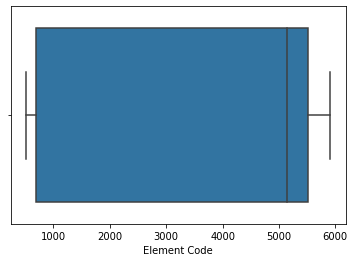

In [7]:
sns.boxplot(x=df['Element Code'])

TypeError: ignored

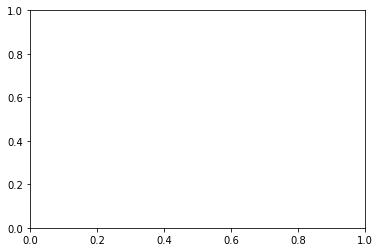

In [109]:
plt.hist(df, bins=10)
plt.show()

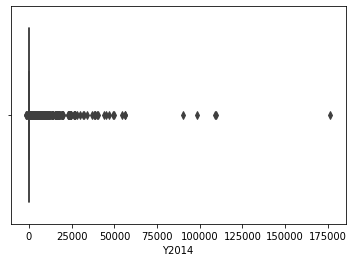

In [8]:
sns.boxplot(x=df['Y2014'])

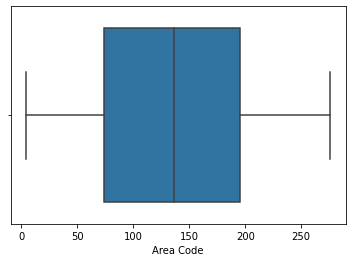

In [10]:
sns.boxplot(x=df['Area Code'])

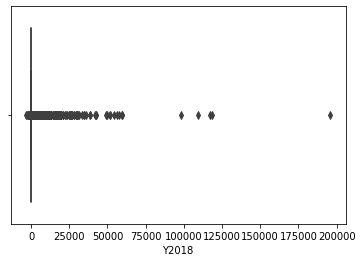

In [11]:
sns.boxplot(x=df['Y2018'])

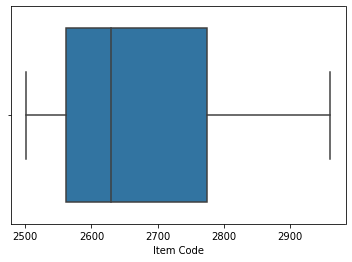

In [12]:
sns.boxplot(x=df['Item Code'])